# Lab 1.2: Custom Filters and Kernels

**Objective:**  
Create and apply custom convolution kernels.  
Understand which filters detect edges, smooth noise, and enhance details.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

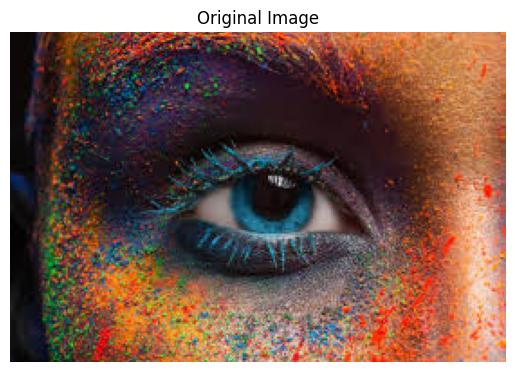

In [6]:
image_path = "images/img1.jpeg"  # change as needed
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [7]:
# 1. Gaussian Blur Kernel (3x3)
gaussian_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16


# 2. Horizontal Edge Detection (Sobel-X)
sobel_x_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)


# 3. Vertical Edge Detection (Sobel-Y)
sobel_y_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)


# 4. Sharpening Kernel
sharpen_kernel = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
], dtype=np.float32)

In [8]:
gaussian_img = cv2.filter2D(img_gray, -1, gaussian_kernel)
sobel_x_img = cv2.filter2D(img_gray, -1, sobel_x_kernel)
sobel_y_img = cv2.filter2D(img_gray, -1, sobel_y_kernel)
sharpen_img = cv2.filter2D(img_gray, -1, sharpen_kernel)

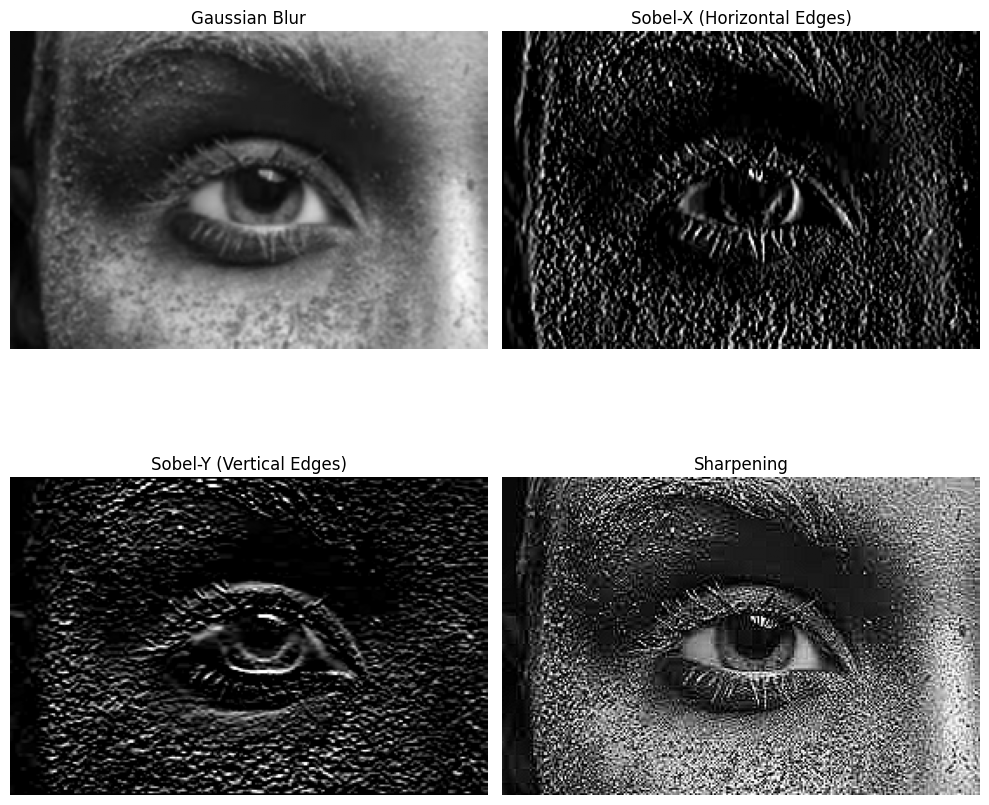

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Gaussian Blur")
plt.imshow(gaussian_img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Sobel-X (Horizontal Edges)")
plt.imshow(sobel_x_img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title("Sobel-Y (Vertical Edges)")
plt.imshow(sobel_y_img, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title("Sharpening")
plt.imshow(sharpen_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

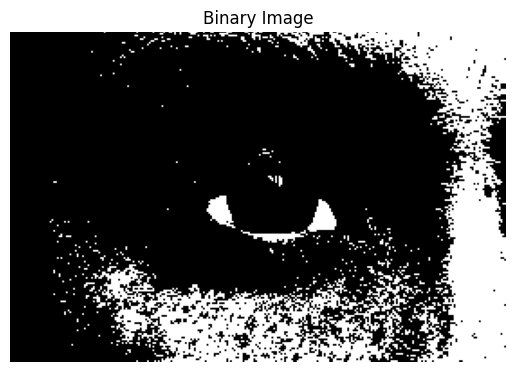

In [10]:
_, binary_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary_img, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

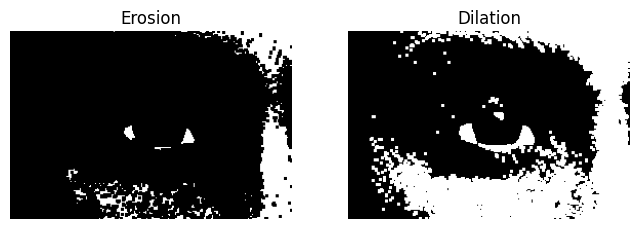

In [11]:
kernel = np.ones((3,3), np.uint8)

eroded = cv2.erode(binary_img, kernel, iterations=1)
dilated = cv2.dilate(binary_img, kernel, iterations=1)

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Erosion")
plt.imshow(eroded, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Dilation")
plt.imshow(dilated, cmap='gray')
plt.axis('off')

plt.show()

## Kernel Comparison Table

| Kernel            | Best For                | Effect Observed |
|------------------|-------------------------|-----------------|
| Gaussian Blur    | Noise reduction         | Smooths image, reduces detail |
| Sobel-X          | Horizontal edges        | Highlights vertical lines |
| Sobel-Y          | Vertical edges          | Highlights horizontal lines |
| Sharpening       | Enhancing details       | Makes edges and textures more prominent |

### Observations:
- Gaussian blur reduces high-frequency noise.
- Sobel filters detect gradients in specific directions.
- Sharpening enhances edge contrast and fine details.